In [123]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [124]:
from astropy.io import fits
import pandas as pd

isFermi = True
normalize = True

# Open the FITS file
if isFermi :
    file_path = "/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/fermi-gbm.fits"  # Replace with your file path
else :
    file_path = "/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse.fits"  # Replace with your file path

with fits.open(file_path) as hdul:
    hdul.info()  # Display information about the HDUs (Header Data Units)
    
    # Assume the data is in the first table HDU
    data = hdul[1].data

    # Convert to a Pandas DataFrame
    df = pd.DataFrame(data.tolist(), columns=data.names)

# Preview the DataFrame
print(df.head())


Filename: /pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/fermi-gbm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FERMIGBRST    1 TableHDU       205   3875R x 33C   [A30, F8.4, F8.4, F15.7, F8.3, F6.3, F8.3, D10.4, D10.4, F9.4, F8.4, F8.3, F9.4, F9.4, D12.6, F7.4, F8.3, F6.3, F8.3, D12.6, D12.6, D13.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D13.6, D13.6, D12.6]   


                             NAME        RA      DEC  TRIGGER_TIME     T90  \
0  GRB120403857                     55.3384 -89.0093  56020.856927   4.288   
1  GRB120227725                    256.7300 -88.8600  55984.725475  17.408   
2  GRB230524357                     13.0800 -87.7700  60088.357309  11.008   
3  GRB231031144                    155.2200 -77.5100  60248.143988  11.520   
4  GRB240421224                    291.8300 -77.3600  60421.223610   4.096   

   T90_ERROR  T90_START       FLUENCE  FLUENCE_ERROR  FLUX_1024  ...  \
0      1.935     -3.968  2.396400e-07   2.045800e-08     1.7469  ...   
1      0.810      0.256  2.194900e-05   1.040300e-07    18.4653  ...   
2      4.720     -5.632  1.420100e-06   4.245700e-08     3.5503  ...   
3      2.573     -1.536  9.104800e-07   2.082500e-08     2.6513  ...   
4      1.864     -5.120  5.311400e-06   9.333200e-06   236.7790  ...   

   PFLX_PLAW_INDEX_NEG_ERR  PFLX_PLAW_PHTFLUX  PFLX_PLAW_PHTFLNC  \
0                 0.072564    

In [125]:
df

,NAME,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,GRB120403857,55.3384,-89.0093,56020.856927,4.288,1.935,-3.968,2.396400e-07,2.045800e-08,1.7469,...,0.072564,2.004649,2.045939,3.451636e-07,205.7393,100.0,202.53480,-0.521362,-2.802798,1.837350
1,GRB120227725,256.7300,-88.8600,55984.725475,17.408,0.810,0.256,2.194900e-05,1.040300e-07,18.4653,...,0.022620,23.012680,23.446380,2.615053e-06,204.6519,100.0,123.06730,-0.339711,-2.277248,17.925290
2,GRB230524357,13.0800,-87.7700,60088.357309,11.008,4.720,-5.632,1.420100e-06,4.245700e-08,3.5503,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3,GRB231031144,155.2200,-77.5100,60248.143988,11.520,2.573,-1.536,9.104800e-07,2.082500e-08,2.6513,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
4,GRB240421224,291.8300,-77.3600,60421.223610,4.096,1.864,-5.120,5.311400e-06,9.333200e-06,236.7790,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,GRB210624041,119.3200,87.1100,59389.040547,0.304,0.333,-0.032,3.798700e-07,2.017400e-08,3.5822,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3871,GRB091012783,109.4000,87.2700,55116.782671,0.704,2.499,0.000,2.124100e-06,4.401700e-08,8.3499,...,0.039825,22.930840,1.453232,5.362506e-06,1049.7280,100.0,1051.90800,-0.254330,-12.778120,21.417150
3872,GRB130528695,138.7380,87.2700,56440.695421,55.553,1.864,0.576,1.109300e-05,1.202000e-07,5.6715,...,0.024157,5.688344,5.803018,1.239637e-06,230.3470,100.0,211.48220,0.227613,-2.894047,5.244317
3873,GRB090813174,225.8020,88.5687,55056.174104,7.552,0.362,0.384,3.325400e-06,4.154000e-08,13.6407,...,0.025906,9.539146,9.718811,1.171084e-06,157.2283,100.0,63.36254,-0.160687,-2.031565,8.829557


In [126]:
verbose = False
# df.fillna(-1, inplace=True)

columns_to_drop = []
# print(fdf.columns)
for column in df.columns :
    df[column] = df[column].replace({'~': ''}, regex=True)  # Remove '~' character
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, setting errors to NaN
    found_ratio = df[column].count()/df[column].index.size
    if verbose :
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
    if (found_ratio*100 < 75.0) :
        columns_to_drop.append(column)
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
        print(f"Dropping column {column} not enough usable data")

fdf = df.drop(columns=columns_to_drop, axis=1)
fdf.dropna(inplace=True)



Missing values in NAME : 0 over 3875 for a % of : 0.0
Dropping column NAME not enough usable data


In [127]:
fdf

,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,FLUX_1024_ERROR,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,55.3384,-89.0093,56020.856927,4.288,1.935,-3.968,2.396400e-07,2.045800e-08,1.7469,0.2388,...,0.072564,2.004649,2.045939,3.451636e-07,205.7393,100.0,202.53480,-0.521362,-2.802798,1.837350
1,256.7300,-88.8600,55984.725475,17.408,0.810,0.256,2.194900e-05,1.040300e-07,18.4653,0.9121,...,0.022620,23.012680,23.446380,2.615053e-06,204.6519,100.0,123.06730,-0.339711,-2.277248,17.925290
2,13.0800,-87.7700,60088.357309,11.008,4.720,-5.632,1.420100e-06,4.245700e-08,3.5503,0.2418,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3,155.2200,-77.5100,60248.143988,11.520,2.573,-1.536,9.104800e-07,2.082500e-08,2.6513,0.2407,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
4,291.8300,-77.3600,60421.223610,4.096,1.864,-5.120,5.311400e-06,9.333200e-06,236.7790,167.4980,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,119.3200,87.1100,59389.040547,0.304,0.333,-0.032,3.798700e-07,2.017400e-08,3.5822,0.3225,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3871,109.4000,87.2700,55116.782671,0.704,2.499,0.000,2.124100e-06,4.401700e-08,8.3499,0.3967,...,0.039825,22.930840,1.453232,5.362506e-06,1049.7280,100.0,1051.90800,-0.254330,-12.778120,21.417150
3872,138.7380,87.2700,56440.695421,55.553,1.864,0.576,1.109300e-05,1.202000e-07,5.6715,0.2736,...,0.024157,5.688344,5.803018,1.239637e-06,230.3470,100.0,211.48220,0.227613,-2.894047,5.244317
3873,225.8020,88.5687,55056.174104,7.552,0.362,0.384,3.325400e-06,4.154000e-08,13.6407,0.2541,...,0.025906,9.539146,9.718811,1.171084e-06,157.2283,100.0,63.36254,-0.160687,-2.031565,8.829557


In [128]:
import pandas as pd
import ast

# Read the TSV file
redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")

# Function to convert string lists to tuples
def parse_tuple(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        try:
            return tuple(ast.literal_eval(value))  # Convert string list to tuple
        except (SyntaxError, ValueError):
            return value  # Return as is if parsing fails
    return value  # Return unchanged if not a list

# Apply function to all columns except the first (Trigger)
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)

# Ensure numeric values remain floats
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')

# Display processed DataFrame
redshift


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:5: SyntaxWarning: invalid escape sequence '\s'
  redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')


,TRIGGER_NUM,µ_Z_H06,PI_50%,PI_90%,µ_Z_L08,PI_50%.1,PI_90%.1,µ_Z_B10,PI_50%.2,PI_90%.2
0,105,0.47,"(0.31, 0.59)","(0.18, 0.91)",0.45,"(0.38, 0.51)","(0.3, 0.65)",0.72,"(0.44, 0.92)","(0.24, 1.43)"
1,107,1.42,"(1.03, 1.72)","(0.71, 2.43)",2.05,"(1.76, 2.33)","(1.35, 2.78)",1.92,"(1.32, 2.37)","(0.86, 3.49)"
2,109,1.60,"(1.14, 1.92)","(0.78, 2.83)",1.88,"(1.65, 2.09)","(1.32, 2.51)",3.05,"(2.22, 3.76)","(1.4, 5.0)"
3,110,2.16,"(1.55, 2.66)","(1.02, 3.69)",3.07,"(2.71, 3.43)","(2.14, 3.96)",3.20,"(2.4, 3.89)","(1.57, 5.13)"
4,111,2.20,"(1.56, 2.71)","(1.01, 3.8)",2.90,"(2.58, 3.23)","(2.05, 3.76)",3.66,"(2.79, 4.33)","(1.82, 5.9)"
...,...,...,...,...,...,...,...,...,...,...
1361,8110,0.98,"(0.74, 1.15)","(0.48, 1.62)",1.08,"(0.95, 1.2)","(0.77, 1.43)",1.37,"(0.95, 1.68)","(0.6, 2.53)"
1362,8111,0.84,"(0.62, 1.01)","(0.39, 1.42)",0.90,"(0.79, 0.99)","(0.64, 1.19)",1.29,"(0.87, 1.59)","(0.53, 2.45)"
1363,8112,1.12,"(0.84, 1.33)","(0.55, 1.88)",1.42,"(1.24, 1.58)","(0.98, 1.88)",1.56,"(1.06, 1.93)","(0.68, 2.9)"
1364,8116,1.09,"(0.82, 1.29)","(0.54, 1.84)",1.24,"(1.09, 1.37)","(0.9, 1.64)",1.81,"(1.22, 2.25)","(0.78, 3.37)"


In [129]:
if not isFermi:
    merged_df = fdf.merge(redshift, on="TRIGGER_NUM", how="left")  # Left join keeps all data_df rows
    fdf = merged_df


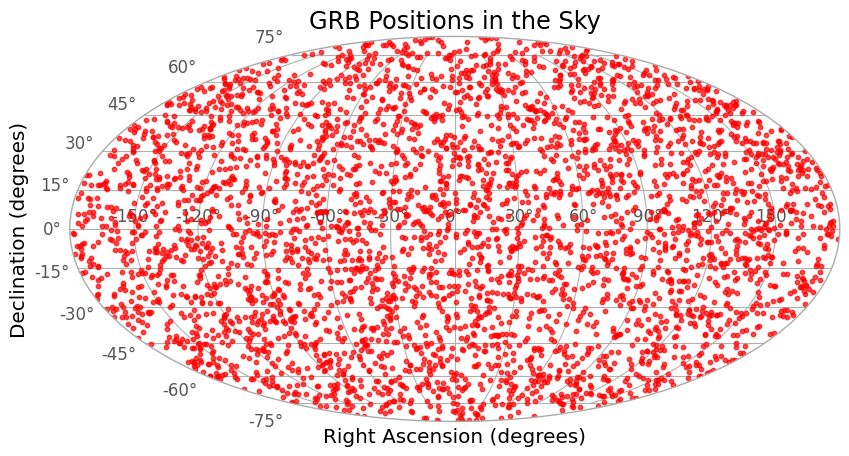

In [130]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization.wcsaxes import WCSAxes
plt.style.use(astropy_mpl_style)

ra = fdf['RA']
dec = fdf['DEC']

coords = SkyCoord(ra=ra.values * u.degree, dec=dec.values * u.degree, frame='icrs')

plt.figure(figsize=(10, 5))
plt.subplot(projection='mollweide')
plt.scatter(coords.ra.wrap_at(180 * u.deg).radian, coords.dec.radian, s=10, c='red', marker='o', alpha=0.7)

plt.grid(True)
plt.title('GRB Positions in the Sky')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')

plt.show()


In [131]:
# from bokeh.plotting import figure, show, output_file
# from bokeh.io import output_notebook
# from scipy.stats import gaussian_kde
# import numpy as np
# from bokeh.io import output_notebook
# output_notebook()

# # Mollweide projection conversion
# def mollweide_projection(ra, dec):
#     ra_rad = np.radians(ra - 180)  # Shift RA to center around 0
#     dec_rad = np.radians(dec)
#     x = 2 * np.sqrt(2) * ra_rad * np.cos(dec_rad / 2) / np.pi
#     y = np.sqrt(2) * np.sin(dec_rad / 2)
#     return x, y

# # Get Mollweide projected coordinates
# x, y = mollweide_projection(fdf['RA'].values, fdf['DEC'].values)

# # Gaussian smearing
# def gaussian_smear(x, y, bandwidth=0.1, num_points=1000):
#     # Create a Gaussian KDE
#     xy = np.vstack([x, y])
#     kde = gaussian_kde(xy, bw_method=bandwidth)

#     # Generate points for the smoothed plot
#     x_grid = np.linspace(x.min(), x.max(), num_points)
#     y_grid = np.linspace(y.min(), y.max(), num_points)
#     x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
#     positions = np.vstack([x_mesh.ravel(), y_mesh.ravel()])
#     values = kde(positions).reshape(x_mesh.shape)

#     return x_mesh, y_mesh, values

# # Perform Gaussian smearing
# x_mesh, y_mesh, values = gaussian_smear(x, y)

# # Create a Bokeh figure for the Mollweide projection
# p = figure(title="GRB Positions with Gaussian Smear", 
#            x_axis_label="X (Mollweide)", 
#            y_axis_label="Y (Mollweide)", 
#            width=800,  # Replace plot_width with width
#            height=400)  # Replace plot_height with height

# # Add the Gaussian smear as an image
# p.image(image=[values], x=x.min(), y=y.min(), dw=x.max() - x.min(), dh=y.max() - y.min(), palette="Viridis256", level="image")

# # Overlay the original scatter points
# p.scatter(x, y, size=5, color="navy", alpha=0.5)
# output_file("plot.html")

# # Show the plot
# show(p)


In [132]:
if isFermi :
    print("available columns", fdf.columns)
    custom_drop = ['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START',
       'FLUENCE_ERROR', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLAW_INDEX_NEG_ERR',
       'PFLX_PLAW_PHTFLUX', 'PFLX_PLAW_PHTFLNC', 'PFLX_PLAW_ERGFLUX',
       'PFLX_COMP_EPEAK', 'PFLX_COMP_PIVOT', 'PFLX_BAND_EPEAK',
       'PFLX_BAND_ALPHA', 'PFLX_BAND_BETA', 'PFLX_BAND_PHTFLUX']
else :
    print(fdf.columns)
    custom_drop = ["TRIGGER_NUM","TIME","RA","T90", "T50","DEC","T50_ERROR","T90_ERROR",'FLUX_64_ERROR', 'FLUX_256_ERROR','FLUX_1024_ERROR','FLUENCE_1_ERROR','FLUENCE_2_ERROR','FLUENCE_3_ERROR','FLUENCE_4_ERROR',"µ_Z_H06","PI_50%","PI_90%","µ_Z_L08","PI_50%.1","PI_90%.1","µ_Z_B10","PI_50%.2","PI_90%.2"]
# custom_drop = ["TRIGGER_NUM","TIME","RA","T90", "T50","DEC","T50_ERROR","T90_ERROR",'FLUX_64_ERROR', 'FLUX_256_ERROR','FLUX_1024_ERROR','FLUENCE_1_ERROR','FLUENCE_2_ERROR','FLUENCE_3_ERROR','FLUENCE_4_ERROR',"PI_50%","PI_90%","µ_Z_L08","PI_50%.1","PI_90%.1","µ_Z_B10","PI_50%.2","PI_90%.2"]

print("dropped columns", fdf.columns)

fdf = fdf.drop(columns=custom_drop, axis=1)
fdf.describe()


available columns Index(['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START', 'FLUENCE',
       'FLUENCE_ERROR', 'FLUX_1024', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64', 'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLAW_INDEX_NEG_ERR',
       'PFLX_PLAW_PHTFLUX', 'PFLX_PLAW_PHTFLNC', 'PFLX_PLAW_ERGFLUX',
       'PFLX_COMP_EPEAK', 'PFLX_COMP_PIVOT', 'PFLX_BAND_EPEAK',
       'PFLX_BAND_ALPHA', 'PFLX_BAND_BETA', 'PFLX_BAND_PHTFLUX'],
      dtype='object')
dropped columns Index(['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START', 'FLUENCE',
       'FLUENCE_ERROR', 'FLUX_1024', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64', 'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLA

,FLUENCE,FLUX_1024,FLUX_64
count,3.875000e+03,3875.000000,3875.000000
mean,2.219566e-05,10.172693,17.928451
std,6.278035e-04,49.781516,95.972622
min,0.000000e+00,-0.546500,0.000000
25%,9.216600e-07,2.227950,4.761900
50%,2.779400e-06,3.741100,6.841200
75%,8.057200e-06,7.474300,12.674100
max,3.883600e-02,2385.000000,3411.570000


In [133]:
from scipy.stats import median_abs_deviation

# Normalize by median and MAD
if normalize :
    fdf = (fdf - fdf.median()) / median_abs_deviation(fdf, scale='normal')

In [134]:
# # Normalize by mean (z-score normalization)
# fdf = (fdf - fdf.mean()) / fdf.std()

# print("\nNormalized by Mean (Z-Score):")
# print(fdf)

In [135]:
fdf

,FLUENCE,FLUX_1024,FLUX_64
0,-0.753290,-0.706220,-1.048336
1,5.685683,5.214387,5.521740
2,-0.403167,-0.067569,-0.258141
3,-0.554320,-0.385939,-0.375582
4,0.750989,82.527394,844.284808
...,...,...,...
3870,-0.711698,-0.056272,3.416638
3871,-0.194361,1.632148,2.874095
3872,2.465805,0.683626,0.174003
3873,0.161943,3.505817,4.291441


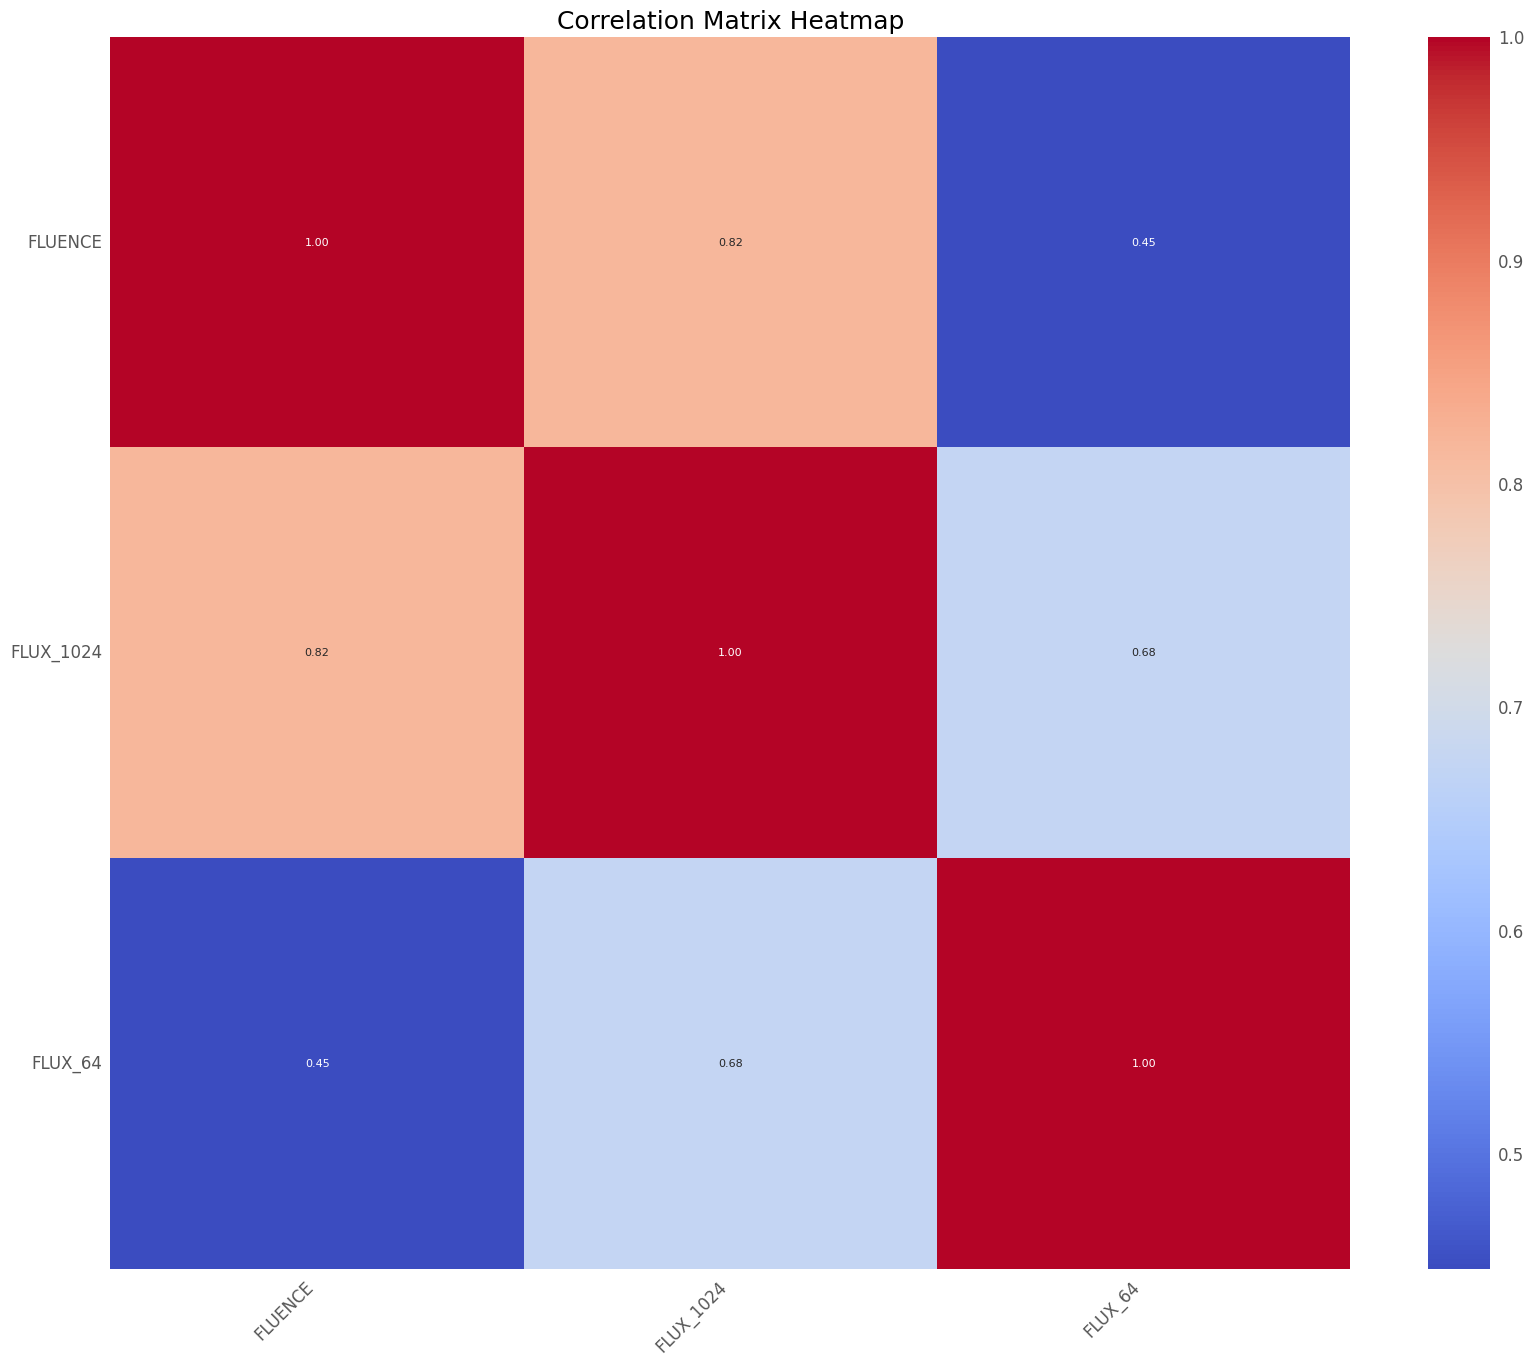

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = fdf.corr()

# Create a heatmap with larger figure size and better label handling
plt.figure(figsize=(20, 16))  # Adjust width and height as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 8})  # Smaller text for annotations
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.show()


In [137]:
tempDF = fdf


In [138]:
tempDF.columns

Index(['FLUENCE', 'FLUX_1024', 'FLUX_64'], dtype='object')

In [139]:
fdf = tempDF
if isFermi :
    fdf = fdf.drop(columns=[], axis=1)
else :
    # fdf = fdf.drop(columns=["FLUX_64","FLUX_256","FLUX_1024"], axis=1)
    fdf = fdf.drop(columns=['FLUENCE_1', 'FLUENCE_2', 'FLUENCE_3',"FLUENCE_4"], axis=1)
    # fdf = fdf.drop(columns=[], axis=1)

fdf

,FLUENCE,FLUX_1024,FLUX_64
0,-0.753290,-0.706220,-1.048336
1,5.685683,5.214387,5.521740
2,-0.403167,-0.067569,-0.258141
3,-0.554320,-0.385939,-0.375582
4,0.750989,82.527394,844.284808
...,...,...,...
3870,-0.711698,-0.056272,3.416638
3871,-0.194361,1.632148,2.874095
3872,2.465805,0.683626,0.174003
3873,0.161943,3.505817,4.291441


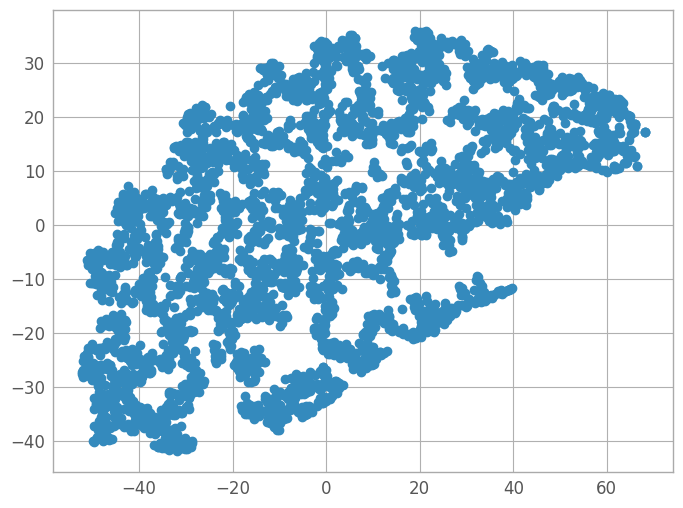

In [140]:
from sklearn.manifold import TSNE

# Sample DataFrame creation (Replace this with your actual DataFrame)
# df = pd.read_csv("your_data_file.csv")
for column in fdf.columns :
    nan_count = fdf[column].isna().sum()
    if verbose :
        print(f"Number of NaN values in the {column}: {nan_count}")



# Impute NaN values with column means
# df_imputed = fdf.fillna(fdf.mean())

filter_nans = False

if filter_nans :
    fdf = fdf.dropna()
    df = df.loc[fdf.index]
    df_imputed = fdf
else :
    df_imputed = fdf.fillna(fdf.mean())

tsne = TSNE(n_components=2, random_state=50,early_exaggeration=50,perplexity=50)
tsne_result = tsne.fit_transform(df_imputed)

# Convert the result to a DataFrame for further analysis
tsne_df = pd.DataFrame(tsne_result, columns=['x', 'y'],index=fdf.index)
plt.scatter(tsne_df.x,tsne_df.y)

In [141]:
df_imputed

,FLUENCE,FLUX_1024,FLUX_64
0,-0.753290,-0.706220,-1.048336
1,5.685683,5.214387,5.521740
2,-0.403167,-0.067569,-0.258141
3,-0.554320,-0.385939,-0.375582
4,0.750989,82.527394,844.284808
...,...,...,...
3870,-0.711698,-0.056272,3.416638
3871,-0.194361,1.632148,2.874095
3872,2.465805,0.683626,0.174003
3873,0.161943,3.505817,4.291441


In [142]:
if not isFermi :
    # merged_df = df.merge(redshift, on="TRIGGER_NUM", how="left").dropna(subset=['µ_Z_H06'])
    merged_df = df.merge(redshift, on="TRIGGER_NUM", how="left")
    merged_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


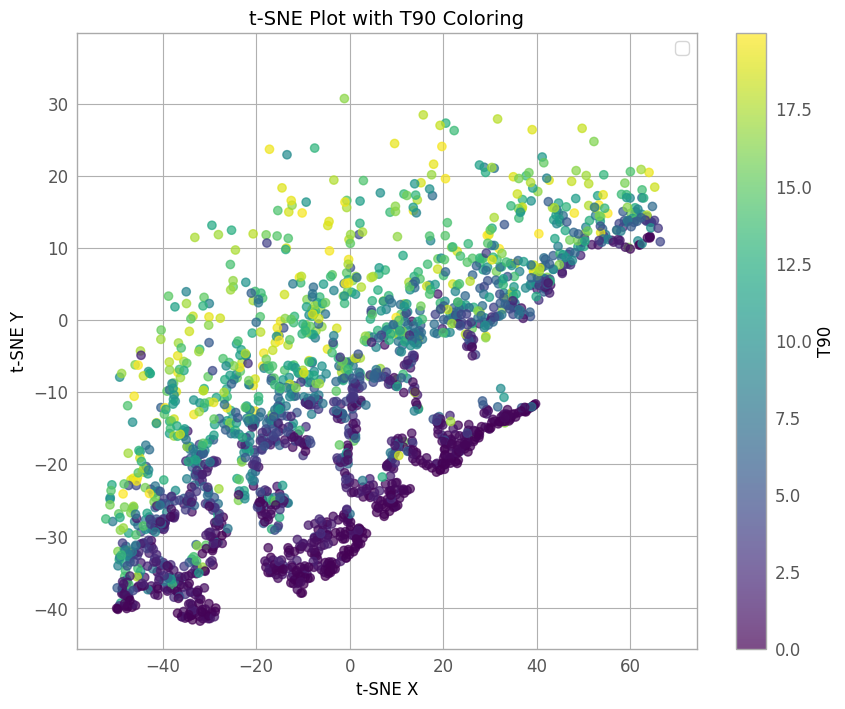

In [143]:
if not isFermi :
    redshift_values = merged_df.loc[tsne_df.index, 'µ_Z_B10']

    redshift_values.loc[redshift_values[redshift_values==0].index] = np.nan

    missing_redshift_mask = redshift_values.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


else :

    
    T90 = df.loc[tsne_df.index, 'T90']

    T90.loc[T90[T90>20].index] = np.nan

    missing_redshift_mask = T90.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=T90.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='T90')
    cbar.set_label('T90', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with T90 Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [157]:
fdf.FLUENCE.max()

11517.892625502767

In [156]:
df.FLUENCE.max()

0.038836

In [170]:
df.FLUX_64

0          2.6136
1         29.1086
2          5.8002
3          5.3266
4       3411.5700
          ...    
3870      20.6194
3871      18.4315
3872       7.5429
3873      24.1472
3874       6.5586
Name: FLUX_64, Length: 3875, dtype: float64

In [168]:
df.FLUX_64.max()

3411.57

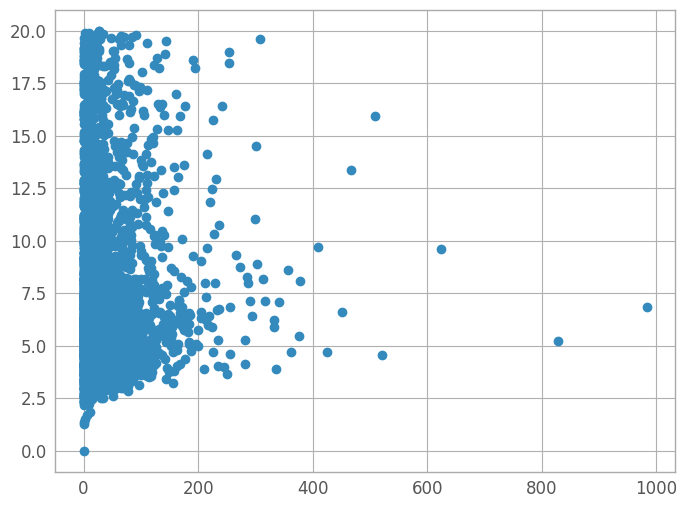

In [181]:
plt.scatter(df.T90[df.FLUX_64 < 20],df.FLUX_64[df.FLUX_64 < 20])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


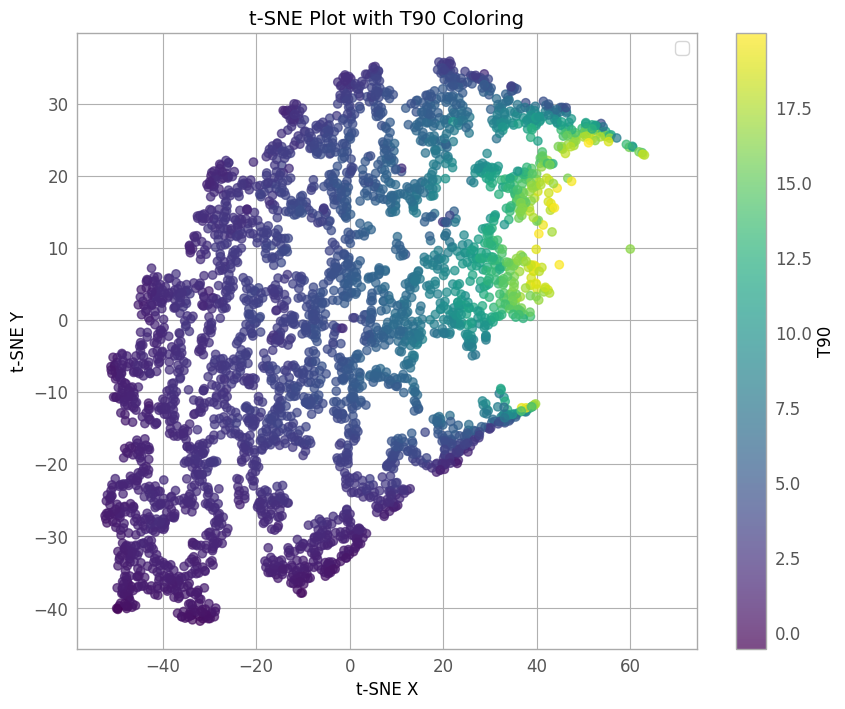

In [175]:
if not isFermi :
    redshift_values = merged_df.loc[tsne_df.index, 'µ_Z_B10']

    redshift_values.loc[redshift_values[redshift_values==0].index] = np.nan

    missing_redshift_mask = redshift_values.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


else :

    
    T90 = df.loc[tsne_df.index, 'FLUX_1024']

    T90.loc[T90[T90>20].index] = np.nan

    missing_redshift_mask = T90.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=T90.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='T90')
    cbar.set_label('T90', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with T90 Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [144]:
if not isFermi :
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.colors import BoundaryNorm, ListedColormap

    # Create a mask for missing redshift values
    missing_redshift_mask = redshift_values.isna()

    # Define the color bins and corresponding colors
    bin_edges = np.arange(0, redshift_values.max() + 0.5, 0.5)  # Bins every 0.5
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink','gold',"olive"]  # Add more colors if needed
    cmap = ListedColormap(colors[:len(bin_edges) - 1])  # Create a colormap
    norm = BoundaryNorm(bin_edges, cmap.N)  # Normalize the bins

    # Plot
    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap=cmap,  # Use the discrete colormap
        norm=norm,  # Use the BoundaryNorm for binning
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.1,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, ticks=bin_edges, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Discrete Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

<Axes: ylabel='Density'>

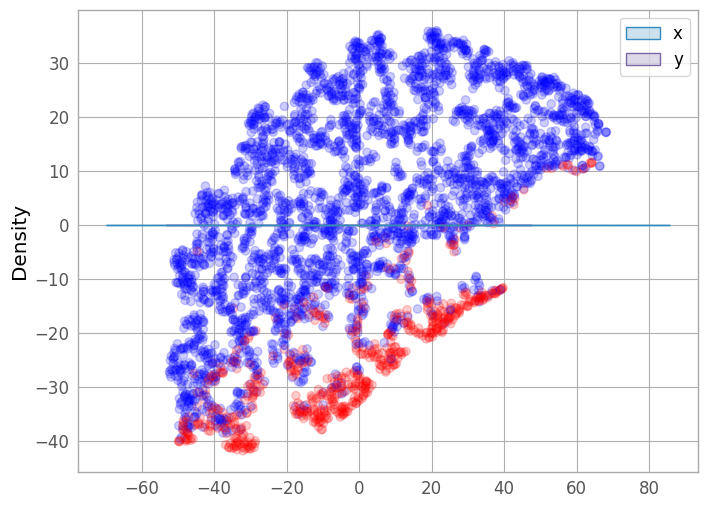

In [145]:
import seaborn as sns

colors = []
# for GRB in fdf.index :
#     if math.isnan(fdf["BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]"][GRB]) :
#         colors.append("red")
#     elif math.isnan(fdf["XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]"][GRB]) :
#         colors.append("blue")
#     elif math.isnan(fdf["XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]"][GRB]) :
#         colors.append("cyan")
#     elif math.isnan(fdf["BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]"][GRB]) :
#         colors.append("green")
#     else :
#         colors.append("Gray")

short_tninety= []
long_tninety= []
for GRB in fdf.index :
    if df["T90"].loc[GRB] >= 2.0:
        colors.append("blue")
        long_tninety.append(GRB)
    elif df["T90"].loc[GRB] < 2.0 :
        colors.append("red")
        short_tninety.append(GRB)
    else :
        colors.append("Gray")

plt.scatter(tsne_df.x,tsne_df.y,c=colors,alpha=0.2)
sns.kdeplot(tsne_df, fill=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


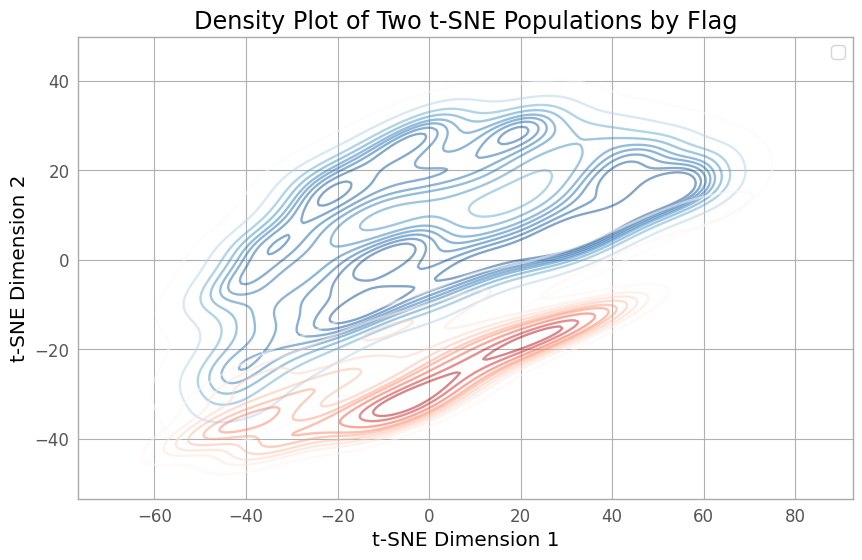

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df contains your t-SNE results ('x_tsne', 'y_tsne') and 'flag_column'
# Create a density plot for each population based on the flag

plt.figure(figsize=(10, 6))

# Population 1: flag == 0
sns.kdeplot(x=tsne_df.x.loc[df['T90'] >= 2.0], 
            y=tsne_df.y.loc[df['T90'] >= 2.0], 
            fill=False, cmap="Blues", label='Population 1 (flag=0)', alpha=0.5)

# Population 2: flag == 1
sns.kdeplot(x=tsne_df.x.loc[df['T90'] < 2.0], 
            y=tsne_df.y.loc[df['T90'] < 2.0], 
            fill=False, cmap="Reds", label='Population 2 (flag=1)', alpha=0.5)

# Add labels and legend
plt.title('Density Plot of Two t-SNE Populations by Flag')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()


(array([147., 200., 162., 199., 199., 193., 224., 176., 262., 177., 163.,
        155., 170., 157., 157., 130., 109.,  99.,  92.,  53.]),
 array([-52.30561829, -46.28073502, -40.25584793, -34.23096466,
        -28.20608139, -22.18119621, -16.15631104, -10.13142776,
         -4.10654306,   1.9183414 ,   7.94322586,  13.96811008,
         19.99299431,  26.01787949,  32.04276276,  38.06764984,
         44.09253311,  50.11741638,  56.14229965,  62.16718674,
         68.19207001]),
 <BarContainer object of 20 artists>)

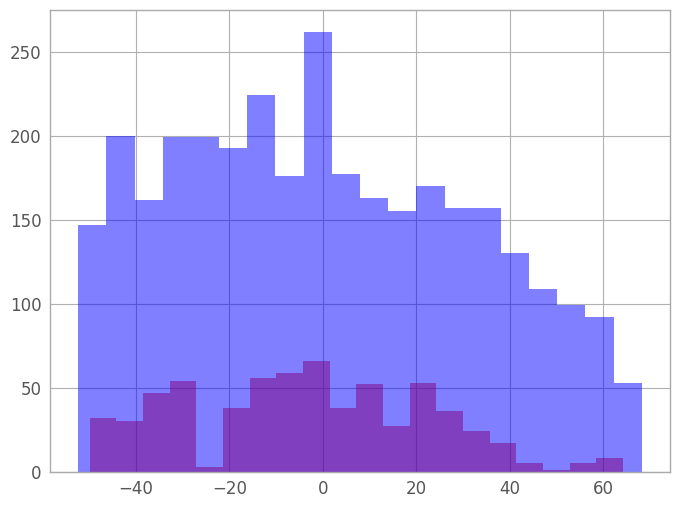

In [182]:
plt.hist(tsne_df.x.loc[short_tninety],bins=20,color="red",alpha=0.5)
plt.hist(tsne_df.x.loc[long_tninety],bins=20,color="blue",alpha=0.5)

(array([ 26.,  56.,  52., 104.,  81., 103., 124., 171., 204., 163., 228.,
        277., 215., 190., 266., 290., 198., 216., 160., 100.]),
 array([-39.66492462, -35.88305664, -32.10118866, -28.31932259,
        -24.53745461, -20.75558853, -16.97372055, -13.19185257,
         -9.40998554,  -5.62811804,  -1.84625053,   1.93561685,
          5.71748447,   9.4993515 ,  13.28121948,  17.06308746,
         20.84495354,  24.62682152,  28.4086895 ,  32.19055557,
         35.97242355]),
 <BarContainer object of 20 artists>)

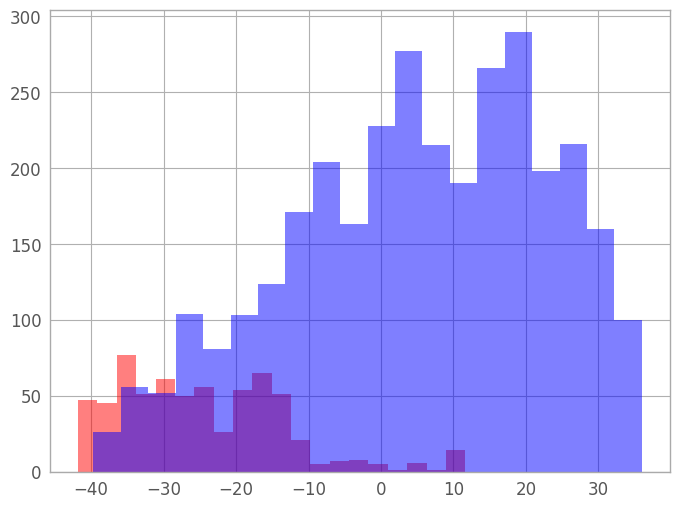

In [183]:
plt.hist(tsne_df.y.loc[short_tninety],bins=20,color="red",alpha=0.5)
plt.hist(tsne_df.y.loc[long_tninety],bins=20,color="blue",alpha=0.5)

In [149]:
tsne_df.y.loc[short_tninety].size

651

In [150]:
tsne_df.y.loc[long_tninety].size

3224

In [151]:
import pandas as pd
import ast

# Read the TSV file
redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")

# Function to convert string lists to tuples
def parse_tuple(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        try:
            return tuple(ast.literal_eval(value))  # Convert string list to tuple
        except (SyntaxError, ValueError):
            return value  # Return as is if parsing fails
    return value  # Return unchanged if not a list

# Apply function to all columns except the first (Trigger)
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)

# Ensure numeric values remain floats
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')

# Display processed DataFrame
redshift


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:5: SyntaxWarning: invalid escape sequence '\s'
  redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)
/scratch/users/w/wsisaid/ipykernel_2805036/1397562291.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')


,TRIGGER_NUM,µ_Z_H06,PI_50%,PI_90%,µ_Z_L08,PI_50%.1,PI_90%.1,µ_Z_B10,PI_50%.2,PI_90%.2
0,105,0.47,"(0.31, 0.59)","(0.18, 0.91)",0.45,"(0.38, 0.51)","(0.3, 0.65)",0.72,"(0.44, 0.92)","(0.24, 1.43)"
1,107,1.42,"(1.03, 1.72)","(0.71, 2.43)",2.05,"(1.76, 2.33)","(1.35, 2.78)",1.92,"(1.32, 2.37)","(0.86, 3.49)"
2,109,1.60,"(1.14, 1.92)","(0.78, 2.83)",1.88,"(1.65, 2.09)","(1.32, 2.51)",3.05,"(2.22, 3.76)","(1.4, 5.0)"
3,110,2.16,"(1.55, 2.66)","(1.02, 3.69)",3.07,"(2.71, 3.43)","(2.14, 3.96)",3.20,"(2.4, 3.89)","(1.57, 5.13)"
4,111,2.20,"(1.56, 2.71)","(1.01, 3.8)",2.90,"(2.58, 3.23)","(2.05, 3.76)",3.66,"(2.79, 4.33)","(1.82, 5.9)"
...,...,...,...,...,...,...,...,...,...,...
1361,8110,0.98,"(0.74, 1.15)","(0.48, 1.62)",1.08,"(0.95, 1.2)","(0.77, 1.43)",1.37,"(0.95, 1.68)","(0.6, 2.53)"
1362,8111,0.84,"(0.62, 1.01)","(0.39, 1.42)",0.90,"(0.79, 0.99)","(0.64, 1.19)",1.29,"(0.87, 1.59)","(0.53, 2.45)"
1363,8112,1.12,"(0.84, 1.33)","(0.55, 1.88)",1.42,"(1.24, 1.58)","(0.98, 1.88)",1.56,"(1.06, 1.93)","(0.68, 2.9)"
1364,8116,1.09,"(0.82, 1.29)","(0.54, 1.84)",1.24,"(1.09, 1.37)","(0.9, 1.64)",1.81,"(1.22, 2.25)","(0.78, 3.37)"
